In [1]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact
import sklearn



In [2]:
import joblib
from flask import Flask, render_template, request

app = Flask(__name__)


In [3]:
# lets read the dataset
data=pd.read_csv('data.csv')

In [4]:
# lets check the shapr of dataset
print("shape of the dataset:", data.shape)

shape of the dataset: (2200, 8)


In [5]:
# lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# lets check if there is any missing value in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
# lets check the crops present in this dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
#lets check the summary of all the crops
print("Average ratio of nitrogen in the soil :{0:.2f} " .format(data['N'].mean()))
print("Average ratio of phosporous in the soil : {0:.2f}" .format(data['P'].mean()))
print("Average ratio of potasium in the soil : {0:.2f}" .format(data['K'].mean()))
print("Average temperature in celcius:{0:.2f}" .format(data['temperature'].mean()))
print("Average relative humidity in % : {0:.2f}" .format(data['humidity'].mean()))
print("Average ph value of the soil : {0:.2f}" .format(data['ph'].mean()))
print("Average rainfall in mm : {0:.2f}" .format(data['rainfall'].mean()))



Average ratio of nitrogen in the soil :50.55 
Average ratio of phosporous in the soil : 53.36
Average ratio of potasium in the soil : 48.15
Average temperature in celcius:25.62
Average relative humidity in % : 71.48
Average ph value of the soil : 6.47
Average rainfall in mm : 103.46


In [9]:
# lets check the summary statics for each of the crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x=data[data['label'] == crops]
    print("---------------------------------------------------")
    print("statistics for nitrogen")
    print("Minimum nitrogen required :", x['N'].min())
    print("average nitrogen required :", x['N'].mean())
    print("Maximum nitrogen required :", x['N'].max())
    print("----------------------------------------------------")
    print("statistics for phosporous")
    print("Minimum phosporous required :", x['P'].min())
    print("Average phosporous required :", x['P'].mean())
    print("Maximum phosporous required :", x['P'].max())
    print("----------------------------------------------------")
    print("statistics for potassium")
    print("Minimum potassium required :", x['K'].min())
    print("Average potassium required :", x['K'].mean())
    print("Maximum potassium required :", x['K'].max())
    print("----------------------------------------------------")
    print("statistics for temperature")
    print("Minimum temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum temperature required : {0:.2f}".format(x['temperature'].max()))
    print("----------------------------------------------------")
    print("statistics for humidity")
    print("Minimum humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum humidity required : {0:.2f}".format(x['humidity'].max()))
    print("-----------------------------------------------------")
    print("statistics for ph")
    print("Minimum ph required : {0:.2f}".format(x['ph'].min()))
    print("Average ph required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum ph required : {0:.2f}".format(x['ph'].max()))
    print("-----------------------------------------------------")
    print("statistics for rainfall")
    print("Minimum rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum rainfall required : {0:.2f}".format(x['rainfall'].max()))
    
    
    
    
    
    
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [12]:
# lets compare the Average Requirements for each crops with average condition

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average value for" , conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("---------------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[(data['label'] == 'blackgrams')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[(data['label'] == 'mungbeans')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'oranges')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[(data['label'] == 'chickpeas')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentils')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[(data['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonbeans')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))
   

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [13]:
#Lets make this function more intuitive

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("---------------------------------------------------")
    print("Crops which require less than average", conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

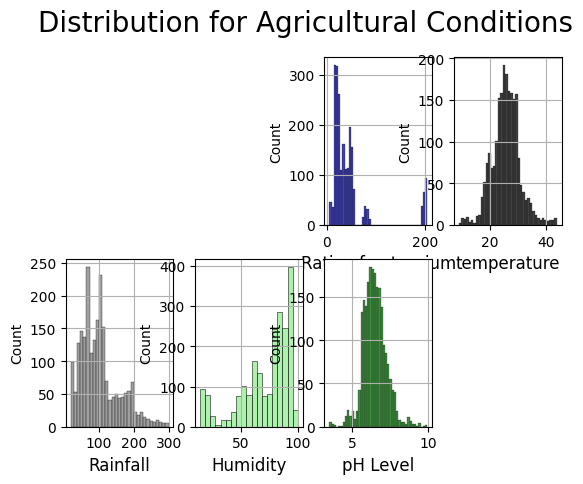

In [22]:
plt.subplot(2, 4, 3)
sns.histplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of potassium' , fontsize = 12)
plt.grid()


plt.subplot(2, 4, 4)
sns.histplot(data['temperature'], color ='black')
plt.xlabel('temperature', fontsize = 12)
plt.grid()


plt.subplot(2, 4, 5)
sns.histplot(data['rainfall'], color ='gray')
plt.xlabel('Rainfall' , fontsize = 12)
plt.grid()


plt.subplot(2, 4, 6)
sns.histplot(data['humidity'], color ='lightgreen')
plt.xlabel('Humidity' , fontsize = 12)
plt.grid()


plt.subplot(2, 4, 7)
sns.histplot(data['ph'], color ='darkgreen')
plt.xlabel('pH Level' , fontsize = 12)
plt.grid()


plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [10]:
## Lets find out some Interesting facts

print("Some Interesting Patterns")
print("------------------------------")
print("crops which require very High ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("crops which require very High ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("crops which require very High ratio of potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("crops which require very High  Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("crops which require very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("crops which require very High Temperaturel:", data[data['temperature'] > 40]['label'].unique())
print("crops which require very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("crops which require very low pH:", data[data['ph'] < 4]['label'].unique())
print("crops which require very High pH:", data[data['ph'] > 9]['label'].unique())


Some Interesting Patterns
------------------------------
crops which require very High ratio of Nitrogen Content in Soil: ['cotton']
crops which require very High ratio of Phosphorous Content in Soil: ['grapes' 'apple']
crops which require very High ratio of potassium Content in Soil: ['grapes' 'apple']
crops which require very High  Rainfall: ['rice' 'papaya' 'coconut']
crops which require very Low Temperature: ['grapes']
crops which require very High Temperaturel: ['grapes' 'papaya']
crops which require very Low Humidity: ['chickpea' 'kidneybeans']
crops which require very low pH: ['mothbeans']
crops which require very High pH: ['mothbeans']


In [11]:
 ## Lets understand which crops can only be Grown in summer season,Winter season and Rainy season
    
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("----------------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("----------------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [12]:
from sklearn.cluster import KMeans

# removing the labels column
x = data.drop(['label'], axis=1)

# selecting all the values of the data
x = x.values

# checking the shape
print(x.shape)

(2200, 7)


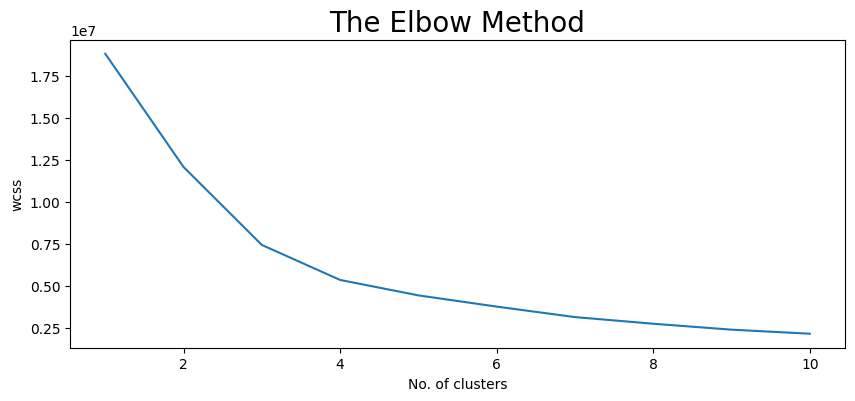

In [13]:
# Lets determine the optimum Number of Clusters within the Dataset

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
# lets implement the K means algorithm to perform clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 0) 
y_means = km.fit_predict(x) 

#Lets find out the Results 
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# Lets check the clusters of each crops
print("Lets check the results After Applying the K-Means Clustering Analysis \n")
print("Crops in first Cluster:" , z[z['cluster'] == 0] ['label'].unique())
print("------------------------------------------------------------------")
print("Crops in Second Cluster:" , z[z['cluster'] == 0] ['label'].unique())
print("------------------------------------------------------------------")
print("Crops in Third Cluster:" , z[z['cluster'] == 0] ['label'].unique())
print("------------------------------------------------------------------")
print("Crops in Fourth Cluster:" , z[z['cluster'] == 0] ['label'].unique())


Lets check the results After Applying the K-Means Clustering Analysis 

Crops in first Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------
Crops in Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------
Crops in Third Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------
Crops in Fourth Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


In [15]:
# Lets split the Dataset for Predictive Modelling

y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:" ,x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [16]:
#Lets create Training and testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [18]:
# Lets create a Predictive Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=100)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\mk634\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


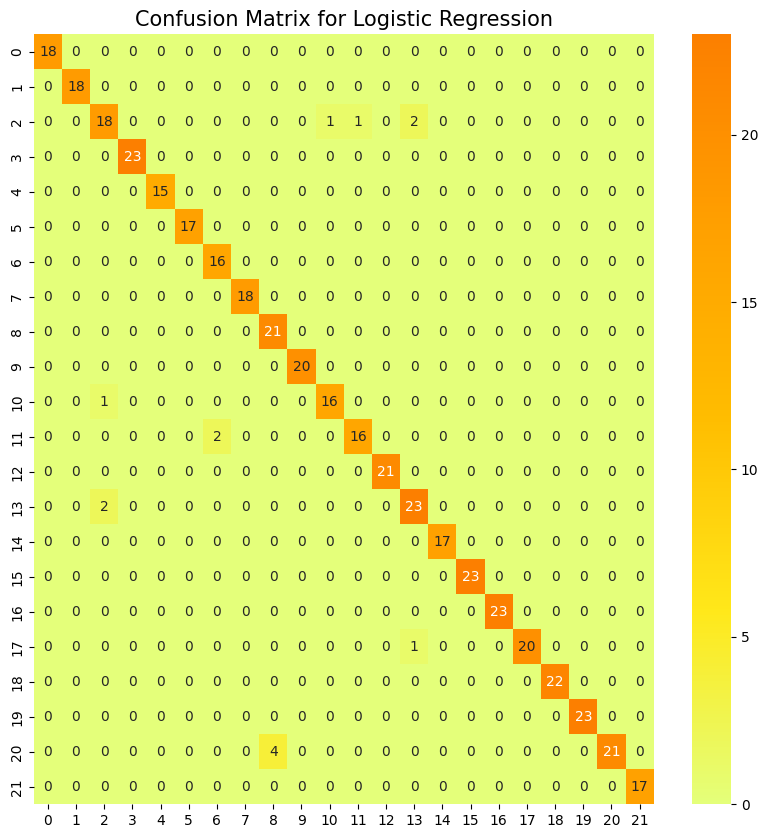

In [19]:
# Lets evaluate the model performance
from sklearn.metrics import confusion_matrix

# lets print the Confusion matrix first 
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

In [20]:
#Lets print the classification Report also
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [21]:
# lets check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))
print("the suggested crop for given climatic condition is :",prediction)

the suggested crop for given climatic condition is : ['rice']


C:\Users\mk634\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
